In [229]:
import random
import numpy as np
import matplotlib.pyplot as plt
from helpers.helper import get_cath
import random
from Bio import SeqIO
from os import listdir
from os.path import isfile, join
import copy

In [3]:
cath = get_cath()

In [22]:
# sort proteins by number of domains and seperate
# maximum number of domains is 6

domain_chains_dict = {
    
}


lengths = {}
for code, info in cath.items():
    chains = info.keys()
    for chain in chains:
        domains = cath[code][chain]
        no_of_domains = len(domains)
        lengths[str(no_of_domains)] = lengths.get(str(no_of_domains), 0) + 1

for n in lengths.keys():
    domain_chains_dict[n] = []

for code, info in cath.items():
    chains = info.keys()
    for chain in chains:
        domains = cath[code][chain]
        no_of_domains = len(domains)
        domain_chains_dict[str(no_of_domains)].append(f'{code}:{chain}')


random_sample = {}
for size, chains in domain_chains_dict.items():
    x = len(chains)
    random_sample[size] = random.sample(chains, min(2500, x))


In [24]:
# number of chains for each size from 6 chains and upwards, accumulated
for i in range(1,21):
    s = str(i)
    if s in random_sample.keys():
        l = len(random_sample[s])
        print(s, l)

1 2500
2 2500
3 2500
4 2500
5 2338
6 863
7 160
8 419
9 75
10 44
11 4
12 21
13 29
14 1
16 8
19 1
20 2


In [25]:
# number of chains for each size from 6 chains and upwards, accumulated
acc = []
for i in range(6,21):
    s = str(i)
    if s in random_sample.keys():
        l = len(random_sample[s])
        acc.append(l)

print(sum(acc))

1627


In [26]:
# total number of chains
all = [len(x) for x in random_sample.values()]
print(sum(all))

13965


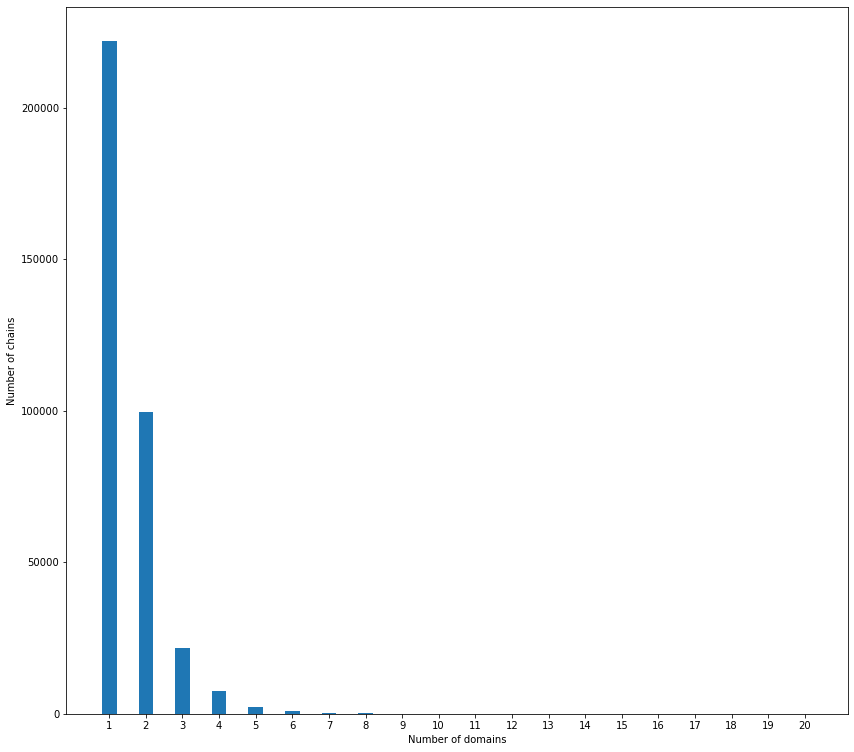

In [44]:
# visualisations

# data from CATH (v. 4.3)
# http://download.cathdb.info/cath/releases/all-releases/v4_3_0/cath-classification-data/

# data = {i : len(domain_chains_dict[str(i)]) for i in domain_chains_dict.keys}

domains = [str(i) for i in range(1,21)]
size = [len(domain_chains_dict.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

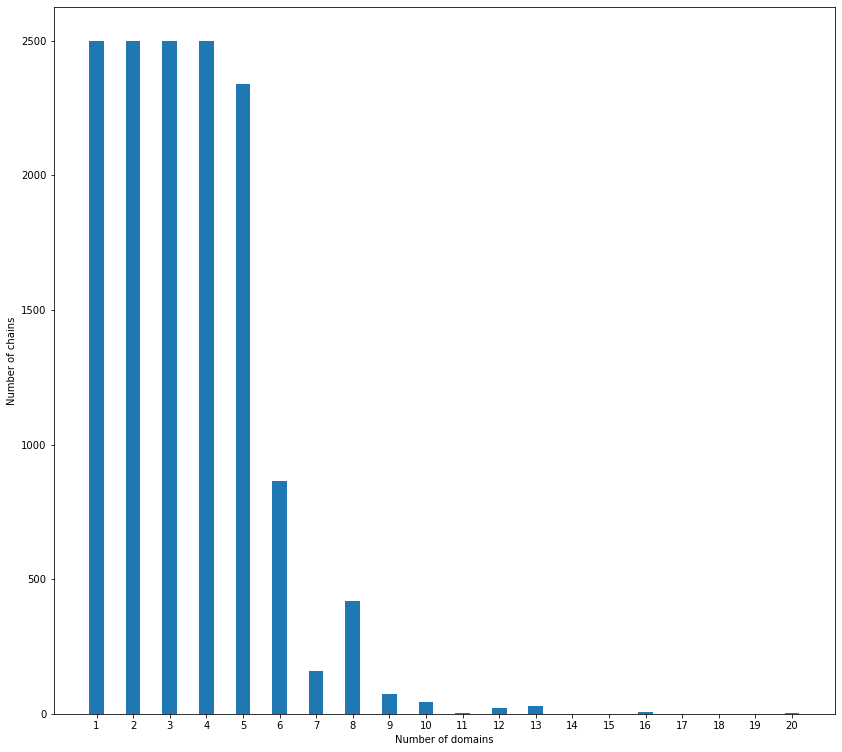

Chains with 1 domains: 2500
Chains with 2 domains: 2500
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 8 domains: 419
Chains with 7 domains: 160
Chains with 6 domains: 863
Chains with 5 domains: 2338
Chains with 10 domains: 44
Chains with 9 domains: 75
Chains with 12 domains: 21
Chains with 13 domains: 29
Chains with 11 domains: 4
Chains with 20 domains: 2
Chains with 19 domains: 1
Chains with 16 domains: 8
Chains with 14 domains: 1


In [243]:
domains = [str(i) for i in range(1,21)]
size = [len(random_sample.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in [int(x) for x in random_sample.keys()]:
    print(f"Chains with {k} domains: {len(random_sample[str(k)])}")

In [194]:
# create comma seperated codes for bulk download
codes = []
for k, v in random_sample.items():
    for chain in v:
        codes.append(chain[:4] + ',')

In [56]:
with open('../data/pdb/bulk/balanced/balanced.txt', 'w') as f:
    f.writelines(codes)

In [221]:
random_sample_keys = []
for k, v in random_sample.items():
    for code in v:
        random_sample_keys.append(code.upper())

In [222]:
len(random_sample_keys)

13965

In [199]:
# print(sorted(random_sample_keys))

In [ ]:
mypath = '../data/pdb/bulk/balanced/backup/data/'

files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# codes = [x[:4] for x in files]
missing = []

chains_of_interest = []
for key in random_sample_keys:
    file = key[:4].lower() + '.pdb'
    PDB_file_path = f'{mypath}{file}'
    try:
        chains = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}
    except FileNotFoundError:
        print("File does not exist", key)
        print()
        missing.append(key)

    # chains.keys() take weird formats some times so try different formats
    key2 = key[:-1] + key[-1].lower()
    key3 = key[-1]
    if (key not in chains.keys()) and (key2 not in chains.keys()) and (key3 not in chains.keys()):
        # missing.append(key)
        print(key)
        print(chains.keys())
        print(file)
        print()
        missing.append(key)


In [218]:
missing

['5EXC:G',
 '5EXC:G',
 '1BOS:J',
 '1BOS:J',
 '1TDM:0',
 '5P8N:A',
 '5OZK:A',
 '5P1Y:A',
 '5P6J:A',
 '5P3I:A',
 '5P1U:A',
 '5OYS:A',
 '5P7E:A',
 '5P6L:A',
 '5P5D:A',
 '5P30:A',
 '5P03:A',
 '5P6Y:A',
 '1ALO:0',
 '1BUK:0']

In [233]:
# function to figure how many domains a chain has (from the sample dict):
def domains_from_chain(chain):
    chain = chain.lower()
    for k, v in random_sample.items():
        v = [x.lower() for x in v]
        if chain in v:
            # print(f"{chain} has {k} domains")
            return k
    print(f"didn't find {chain}")
    

In [192]:
missing

['5EXC:G',
 '5EXC:G',
 '1BOS:J',
 '1BOS:J',
 '1TDM:0',
 '5P8N:A',
 '5OZK:A',
 '5P1Y:A',
 '5P6J:A',
 '5P3I:A',
 '5P1U:A',
 '5OYS:A',
 '5P7E:A',
 '5P6L:A',
 '5P5D:A',
 '5P30:A',
 '5P03:A',
 '5P6Y:A',
 '1ALO:0',
 '1BUK:0']

In [234]:
for c in missing:
    print(c, "has", domains_from_chain(c))

5EXC:G has 1
5EXC:G has 1
1BOS:J has 1
1BOS:J has 1
1TDM:0 has 1
5P8N:A has 2
5OZK:A has 2
5P1Y:A has 2
5P6J:A has 2
5P3I:A has 2
5P1U:A has 2
5OYS:A has 2
5P7E:A has 2
5P6L:A has 2
5P5D:A has 2
5P30:A has 2
5P03:A has 2
5P6Y:A has 2
1ALO:0 has 7
1BUK:0 has 6


### Finally

After performing stratified sampling and downloading the data, only 20 chains were missings. The results are shown below

In [241]:
true_random_sample = copy.deepcopy(random_sample)
for chain in missing:
    chain = chain[:-1].lower() + chain[-1]
    # print(chain)
    n = domains_from_chain(chain)
    try:
        true_random_sample[str(n)].remove(chain)
    except ValueError:
        print(chain, "not in") # probably removed already

5exc:G not in
1bos:J not in


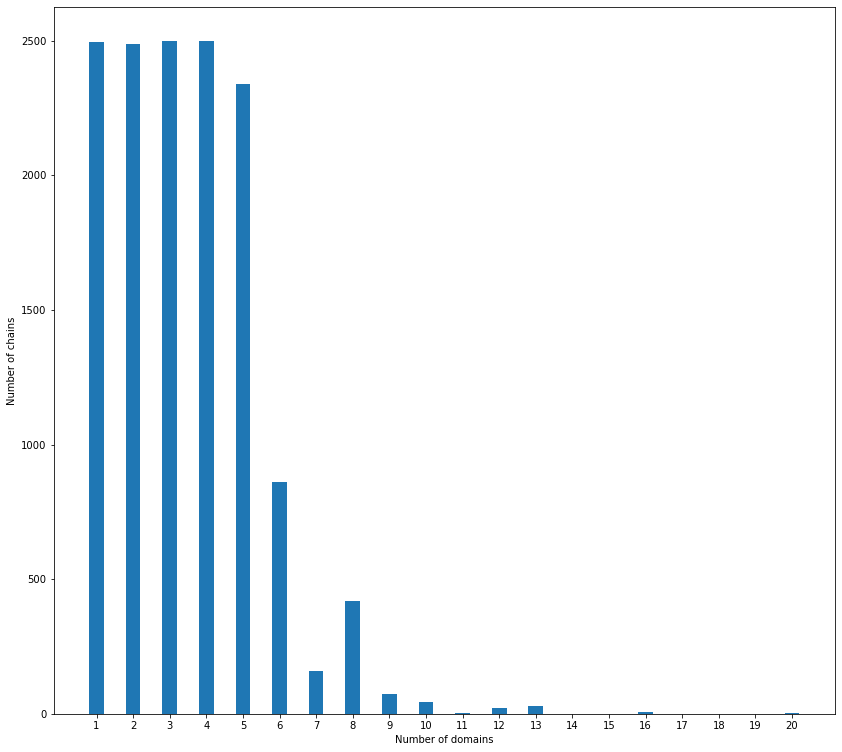

Chains with 1 domains: 2497
Chains with 2 domains: 2487
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 8 domains: 419
Chains with 7 domains: 159
Chains with 6 domains: 862
Chains with 5 domains: 2338
Chains with 10 domains: 44
Chains with 9 domains: 75
Chains with 12 domains: 21
Chains with 13 domains: 29
Chains with 11 domains: 4
Chains with 20 domains: 2
Chains with 19 domains: 1
Chains with 16 domains: 8
Chains with 14 domains: 1


In [242]:
domains = [str(i) for i in range(1,21)]
size = [len(true_random_sample.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in [int(x) for x in true_random_sample.keys()]:
    print(f"Chains with {k} domains: {len(true_random_sample[str(k)])}")